# Speed and Alignment Notebook |

##### <strong>Author:</strong> <u>Walter Dych</u> <em>(walterpdych@gmail.com)</em>
##### <strong>Edits/Documentation:</strong> <u>Karee Garvin</u> <em>(kgarvin@fas.harvard.edu)</em>

This notebook focuses on calculating the speed of the right wrist and aligning it with pitch data.

## Load Data
In this section, the data is loaded into the notebook for further processing. You can adjust the source file paths as needed.

In [1]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

In [29]:
# Load wrist keypoint data
keypoints_df = pd.read_pickle('C:/Users/cosmo/Desktop/Random Scripts/Co-Speech Gesture Automation/Co-Speech-Gesture-Automation/MOTION_TRACKING_FILES/5012_I_keypoints.pkl')

In [30]:
# Convert keypoints data to DataFrame
keypoints_df = pd.DataFrame(keypoints_df)
# Show pitch and keypoint data
keypoints_df

,time_ms,right_shoulder_x,right_shoulder_y,left_shoulder_x,left_shoulder_y,right_elbow_x,right_elbow_y,left_elbow_x,left_elbow_y,right_wrist_x,right_wrist_y,left_wrist_x,left_wrist_y,right_eye_x,right_eye_y,left_eye_x,left_eye_y,nose_x,nose_y
0,0.000000,0.346543,0.413691,0.403167,0.370346,0.267567,0.594082,0.388862,0.499703,0.243763,0.848833,0.379629,0.624571,0.442876,0.292149,0.445312,0.289609,0.447097,0.314755
1,33.366667,0.349762,0.404192,0.403014,0.368685,0.267428,0.593026,0.388766,0.514284,0.243417,0.847239,0.391232,0.657073,0.443817,0.291971,0.446493,0.289600,0.448412,0.314845
2,66.733333,0.351200,0.403555,0.402127,0.367687,0.267399,0.593162,0.381889,0.549503,0.242909,0.846286,0.382327,0.708674,0.444323,0.292319,0.447014,0.290269,0.448583,0.317095
3,100.100000,0.353098,0.402300,0.398918,0.361902,0.267950,0.593586,0.376209,0.541252,0.242784,0.846112,0.378689,0.683741,0.445723,0.292993,0.448321,0.291113,0.449652,0.318940
4,133.466667,0.355514,0.397340,0.396794,0.362337,0.268713,0.593200,0.370343,0.570560,0.242482,0.846839,0.362583,0.754018,0.447435,0.292911,0.449688,0.291053,0.451239,0.319041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19494,650449.800000,0.238439,0.366778,0.325441,0.332039,0.242718,0.621743,0.326518,0.533944,0.362085,0.709622,0.370577,0.670067,0.308809,0.195500,0.332758,0.203717,0.325474,0.227894
19495,650483.166667,0.238767,0.365260,0.326205,0.333711,0.237742,0.621175,0.326006,0.536027,0.361361,0.704469,0.371994,0.669746,0.308856,0.195518,0.333087,0.203666,0.325584,0.227865
19496,650516.533333,0.238778,0.365264,0.327986,0.334837,0.231410,0.619890,0.326002,0.535907,0.356160,0.699456,0.378909,0.654336,0.308489,0.195568,0.333328,0.203704,0.325390,0.227833
19497,650549.900000,0.238771,0.365269,0.330313,0.336026,0.226552,0.619473,0.326046,0.533799,0.352094,0.687707,0.382221,0.632677,0.309120,0.196582,0.334145,0.204837,0.325690,0.228596


## Choosing The Right Keypoints

Using this script, we can isolate the keypoints with which we would like to perform the analyses on. Below is the index of Keypoints defined in mediapipe:

<figure>
    <img src="https://developers.google.com/static/mediapipe/images/solutions/pose_landmarks_index.png" width=25% height=25%
         alt="Keypoint Index">
    <figcaption>Mediapipe Pose Keypoint Index</figcaption>
</figure>

In [31]:
KEYPOINT = "right_wrist"

## Calculate Unsmoothed Speed
Here, the speed of the right wrist is calculated without any smoothing. Parameters such as the sampling rate can be adjusted.

In [32]:
# Calculate the unsmoothed speed of the right wrist
keypoints_df['delta_time'] = keypoints_df['time_ms'].diff()
keypoints_df['delta_x'] = keypoints_df[KEYPOINT + '_x'].diff()
keypoints_df['delta_y'] = keypoints_df[KEYPOINT + '_y'].diff()

# Speed = sqrt(delta_x^2 + delta_y^2) / delta_time
keypoints_df['speed_unsmooth'] = np.sqrt(keypoints_df['delta_x']**2 + keypoints_df['delta_y']**2) / (keypoints_df['delta_time'] / 1000)  # in unit/s

## Apply Savitzky-Golay Filtering
The Savitzky-Golay filtering method is applied to smooth the speed data. You can adjust the window size and polynomial order.

In [33]:
keypoints_df['speed_smooth'] = [0 if x < np.percentile(keypoints_df['speed_unsmooth'], 20) else x for x in keypoints_df['speed_unsmooth']]
keypoints_df['speed_smooth'] = savgol_filter(keypoints_df['speed_unsmooth'], 9, 2)
keypoints_df

,time_ms,right_shoulder_x,right_shoulder_y,left_shoulder_x,left_shoulder_y,right_elbow_x,right_elbow_y,left_elbow_x,left_elbow_y,right_wrist_x,...,right_eye_y,left_eye_x,left_eye_y,nose_x,nose_y,delta_time,delta_x,delta_y,speed_unsmooth,speed_smooth
0,0.000000,0.346543,0.413691,0.403167,0.370346,0.267567,0.594082,0.388862,0.499703,0.243763,...,0.292149,0.445312,0.289609,0.447097,0.314755,NaN,NaN,NaN,NaN,NaN
1,33.366667,0.349762,0.404192,0.403014,0.368685,0.267428,0.593026,0.388766,0.514284,0.243417,...,0.291971,0.446493,0.289600,0.448412,0.314845,33.366667,-0.000346,-0.001594,0.048880,NaN
2,66.733333,0.351200,0.403555,0.402127,0.367687,0.267399,0.593162,0.381889,0.549503,0.242909,...,0.292319,0.447014,0.290269,0.448583,0.317095,33.366667,-0.000508,-0.000953,0.032376,NaN
3,100.100000,0.353098,0.402300,0.398918,0.361902,0.267950,0.593586,0.376209,0.541252,0.242784,...,0.292993,0.448321,0.291113,0.449652,0.318940,33.366667,-0.000125,-0.000174,0.006426,NaN
4,133.466667,0.355514,0.397340,0.396794,0.362337,0.268713,0.593200,0.370343,0.570560,0.242482,...,0.292911,0.449688,0.291053,0.451239,0.319041,33.366667,-0.000302,0.000728,0.023610,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19494,650449.800000,0.238439,0.366778,0.325441,0.332039,0.242718,0.621743,0.326518,0.533944,0.362085,...,0.195500,0.332758,0.203717,0.325474,0.227894,33.366667,-0.000760,-0.004396,0.133698,0.102857
19495,650483.166667,0.238767,0.365260,0.326205,0.333711,0.237742,0.621175,0.326006,0.536027,0.361361,...,0.195518,0.333087,0.203666,0.325584,0.227865,33.366667,-0.000724,-0.005153,0.155950,0.167700
19496,650516.533333,0.238778,0.365264,0.327986,0.334837,0.231410,0.619890,0.326002,0.535907,0.356160,...,0.195568,0.333328,0.203704,0.325390,0.227833,33.366667,-0.005201,-0.005013,0.216497,0.249860
19497,650549.900000,0.238771,0.365269,0.330313,0.336026,0.226552,0.619473,0.326046,0.533799,0.352094,...,0.196582,0.334145,0.204837,0.325690,0.228596,33.366667,-0.004066,-0.011749,0.372611,0.349335


## Align Speed Data with Pitch Data
This section aligns the calculated speed data with the pitch data. Any time offsets or scaling factors can be adjusted here.

In [34]:
# Upsample the speed data to match the 10 ms sample rate of the pitch data
keypoints_df['time_ms'] = pd.to_timedelta(keypoints_df['time_ms'], unit='ms')
keypoints_df = keypoints_df.set_index('time_ms')
keypoints_df_upsampled = keypoints_df.resample('10ms').mean().interpolate(method='linear')

# Convert the datetime index to integer format
keypoints_df_upsampled.index = (keypoints_df_upsampled.index - keypoints_df_upsampled.index[0]).total_seconds() * 1000

# Merge the upsampled speed data with the pitch data
aligned_df = keypoints_df_upsampled

# Drop unnecessary columns
aligned_df = aligned_df.drop(columns=['delta_time', 'delta_x', 'delta_y'])

## Save Aligned Data as CSV
Finally, the aligned data is saved as a CSV file. You can specify the destination path for the output file.

In [35]:
# Save the aligned data as a CSV file
aligned_df['time_ms'] = pd.to_numeric(aligned_df.index)
aligned_df.to_csv(f'C:/Users/cosmo/Desktop/Random Scripts/Co-Speech Gesture Automation/Co-Speech-Gesture-Automation/SPEED_FILES/5012_I_'+ KEYPOINT + '_processed_data.csv', index=False)
aligned_df.head()

,right_shoulder_x,right_shoulder_y,left_shoulder_x,left_shoulder_y,right_elbow_x,right_elbow_y,left_elbow_x,left_elbow_y,right_wrist_x,right_wrist_y,...,left_wrist_y,right_eye_x,right_eye_y,left_eye_x,left_eye_y,nose_x,nose_y,speed_unsmooth,speed_smooth,time_ms
time_ms,,,,,,,,,,,,,,,,,,,,,
0.0,0.346543,0.413691,0.403167,0.370346,0.267567,0.594082,0.388862,0.499703,0.243763,0.848833,...,0.624571,0.442876,0.292149,0.445312,0.289609,0.447097,0.314755,NaN,NaN,0.0
10.0,0.347616,0.410525,0.403116,0.369793,0.267520,0.593730,0.388830,0.504563,0.243648,0.848302,...,0.635405,0.443190,0.292090,0.445706,0.289606,0.447535,0.314785,NaN,NaN,10.0
20.0,0.348689,0.407358,0.403065,0.369239,0.267474,0.593378,0.388798,0.509424,0.243532,0.847770,...,0.646239,0.443504,0.292031,0.446099,0.289603,0.447973,0.314815,NaN,NaN,20.0
30.0,0.349762,0.404192,0.403014,0.368685,0.267428,0.593026,0.388766,0.514284,0.243417,0.847239,...,0.657073,0.443817,0.291971,0.446493,0.289600,0.448412,0.314845,0.048880,NaN,30.0
40.0,0.350241,0.403980,0.402719,0.368353,0.267418,0.593071,0.386474,0.526024,0.243248,0.846921,...,0.674273,0.443986,0.292087,0.446667,0.289823,0.448469,0.315595,0.043379,NaN,40.0


## Plot Data


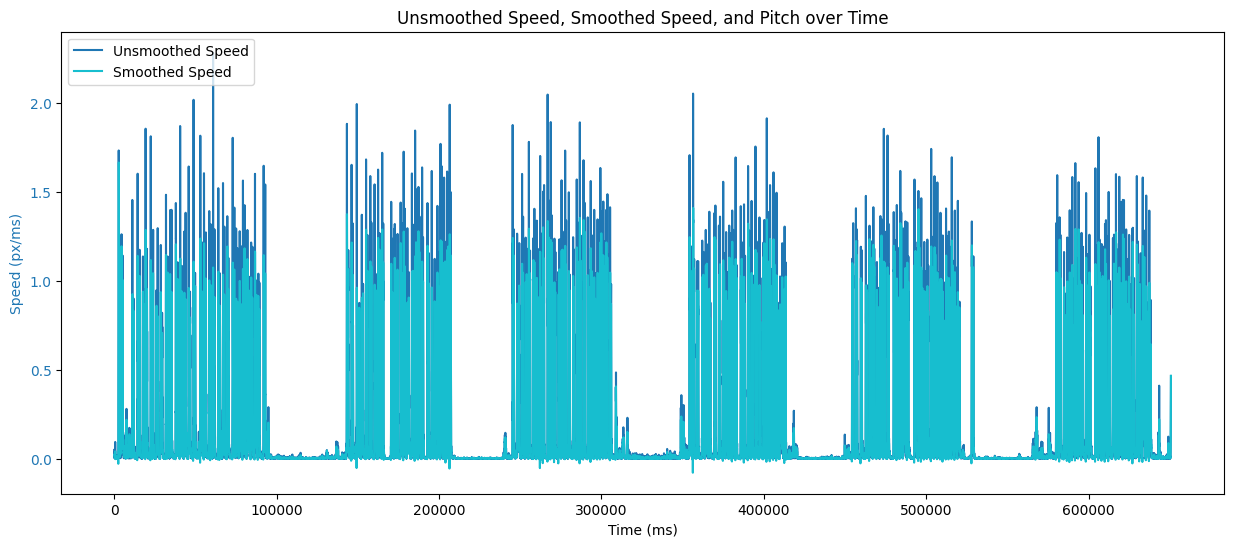

In [36]:
# Create a plot
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot unsmoothed and smoothed speed
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Speed (px/ms)', color='tab:blue')
ax1.plot(aligned_df['time_ms'], aligned_df['speed_unsmooth'], label='Unsmoothed Speed', color='tab:blue')
ax1.plot(aligned_df['time_ms'], aligned_df['speed_smooth'], label='Smoothed Speed', color='tab:cyan')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Add title and legend
plt.title('Unsmoothed Speed, Smoothed Speed, and Pitch over Time')
ax1.legend(loc='upper left')

plt.show()